In [55]:
import os
import skimage
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np

In [56]:
def down_scale_lanczos(image_path):
    image = skimage.io.imread(image_path)
    image = image[:, :image.shape[0]]
    image = cv.resize(image, (1024, 1024), interpolation=cv.INTER_LANCZOS4)
    image = cv.medianBlur(image, 5)
    return image

def down_scale_skimage(image_path):
    image = skimage.io.imread(image_path)
    image = image[:, :image.shape[0]]
    image = skimage.transform.resize(image, (1024, 1024), anti_aliasing=True)
    return image

def down_scale(image_path):
    image = skimage.io.imread(image_path)
    image = image[:, :image.shape[0]]
    image = cv.resize(image, (1024, 1024), interpolation=cv.INTER_AREA)
    return image

def load_image(image_path):
    return skimage.io.imread(image_path)

In [ ]:
path = "../../02_Data/Structured_Al/SB7/LM/"

In [62]:
im_names = [path + file for file in os.listdir(path)]

uint8


Text(0.5, 1.0, 'Downscaled Image (Skimage)')

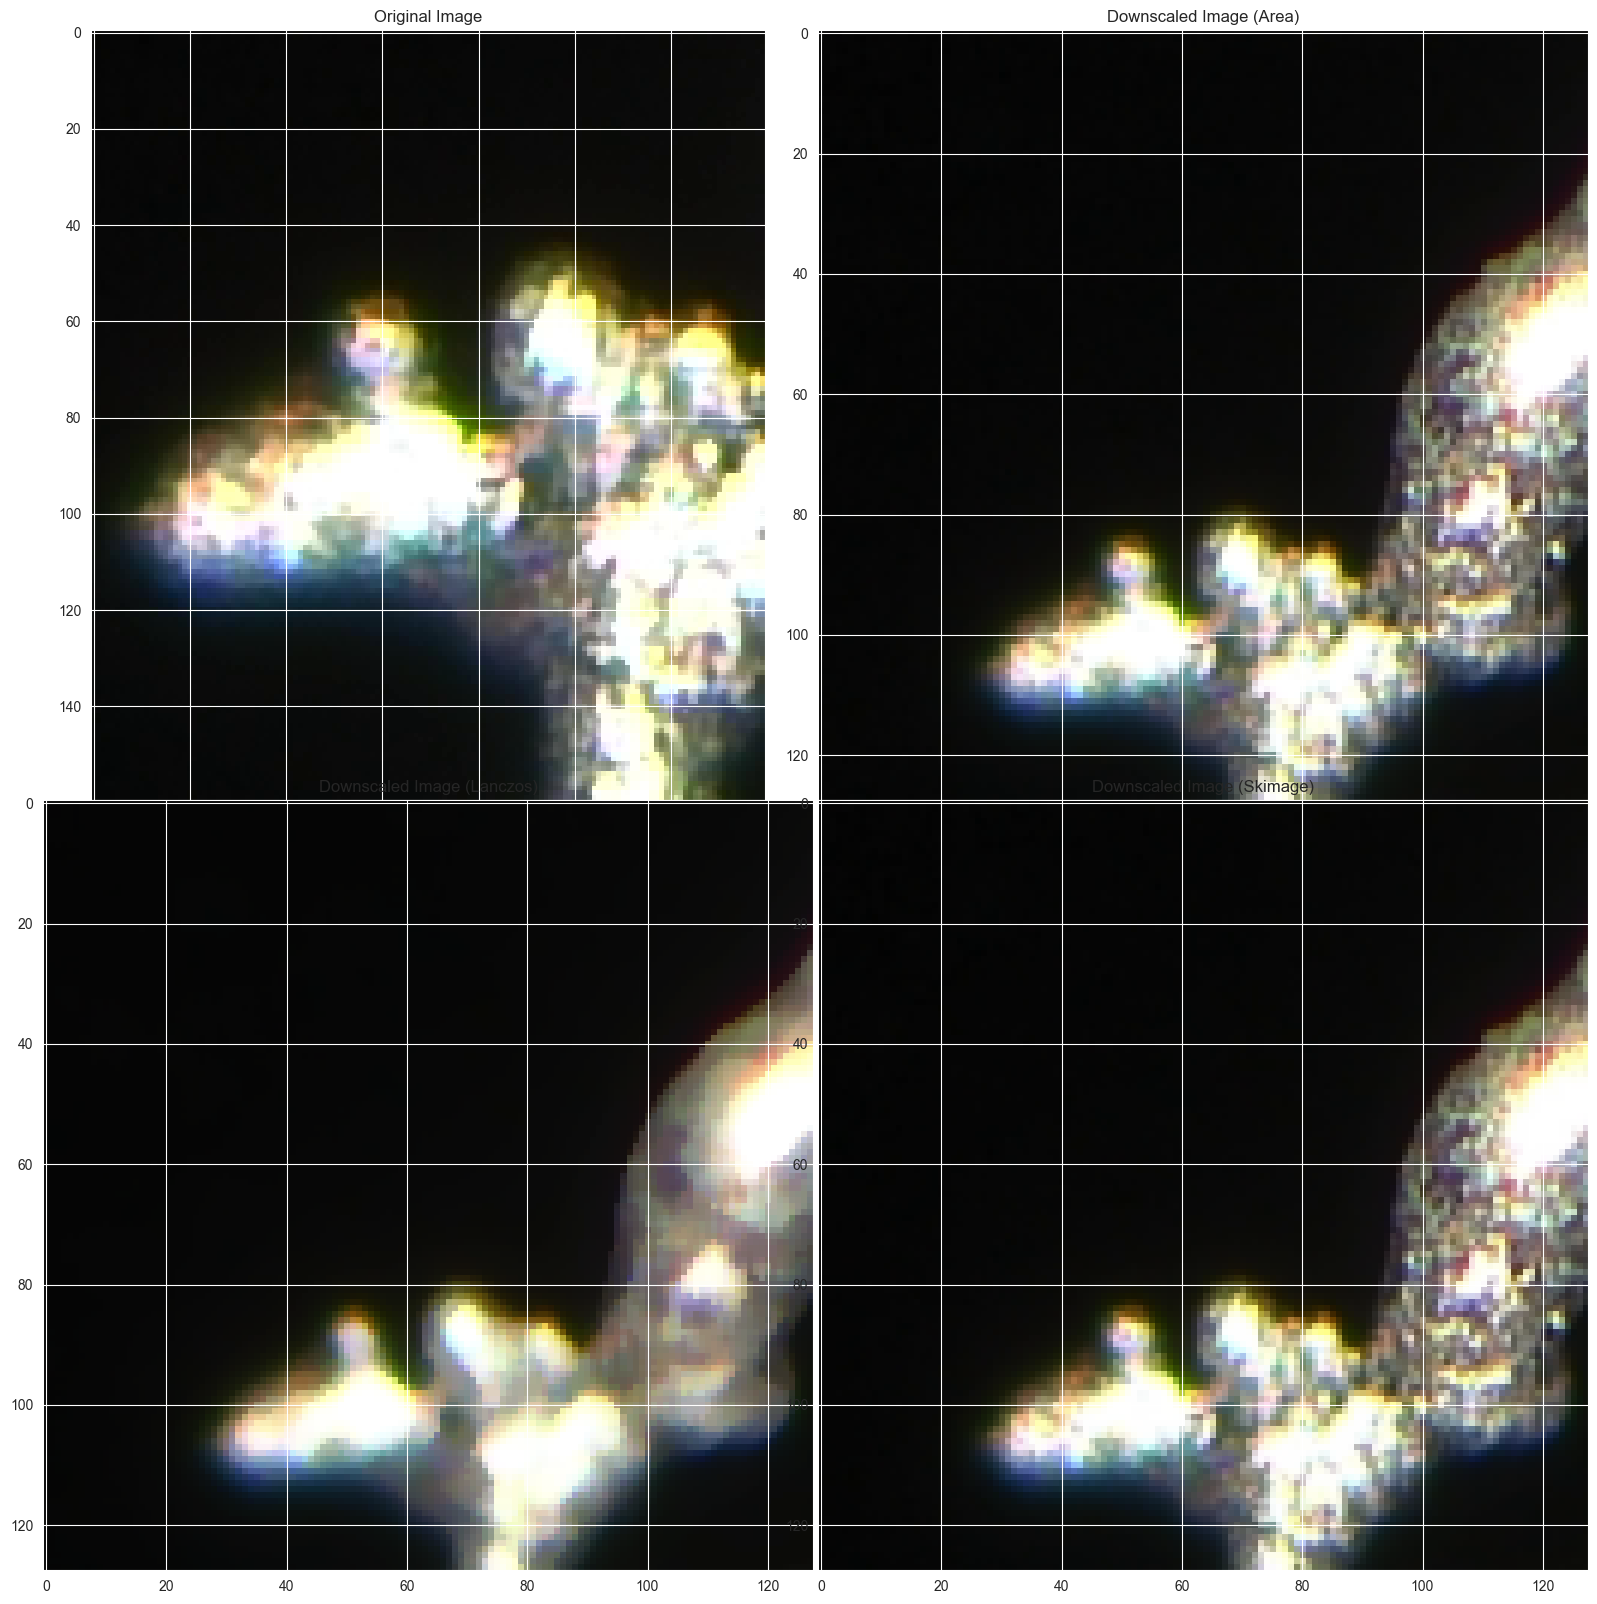

In [63]:
im_name = im_names[0]
roi = [300, 600]
size = 64
zoom = np.s_[roi[0]-size:roi[0]+size, roi[1]-size:roi[1]+size]
im = load_image(im_name)
print(im.dtype)
fig, axs = plt.subplots(2, 2, figsize=(20, 20))
plt.subplots_adjust(wspace=0, hspace=0)
axs[0, 0].imshow(load_image(im_name)[620:780, 1180:1320])
axs[0, 0].set_title("Original Image")
axs[0, 1].imshow(down_scale(im_name)[zoom])
axs[0, 1].set_title("Downscaled Image (Area)")
axs[1, 0].imshow(down_scale_lanczos(im_name)[zoom])
axs[1, 0].set_title("Downscaled Image (Lanczos)")
axs[1, 1].imshow(down_scale_skimage(im_name)[zoom])
axs[1, 1].set_title("Downscaled Image (Skimage)")

Lanczos interpolation was chosen, as computational speed was not as important and the downscaling shows the highest fidelity to the original image.